Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170849 entries, 0 to 170848
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             170849 non-null  int64  
 1   trans_date_trans_time  170849 non-null  object 
 2   cc_num                 170849 non-null  int64  
 3   merchant               170849 non-null  object 
 4   category               170849 non-null  object 
 5   amt                    170849 non-null  float64
 6   first                  170849 non-null  object 
 7   last                   170849 non-null  object 
 8   gender                 170849 non-null  object 
 9   street                 170849 non-null  object 
 10  city                   170849 non-null  object 
 11  state                  170849 non-null  object 
 12  zip                    170849 non-null  int64  
 13  lat                    170849 non-null  float64
 14  long            

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00    170092
         1.0       0.00      1.00      0.01       718

    accuracy                           0.00    170810
   macro avg       0.00      0.50      0.00    170810
weighted avg       0.00      0.00      0.00    170810



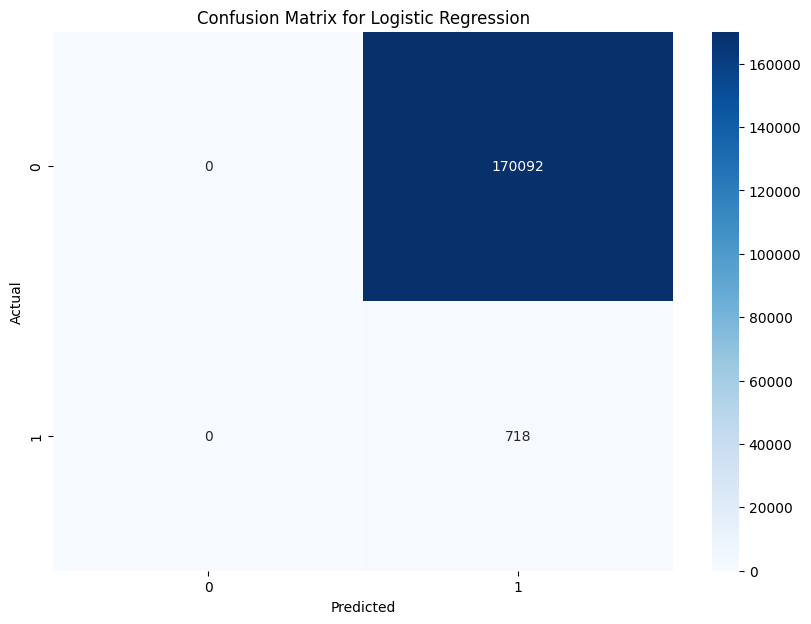

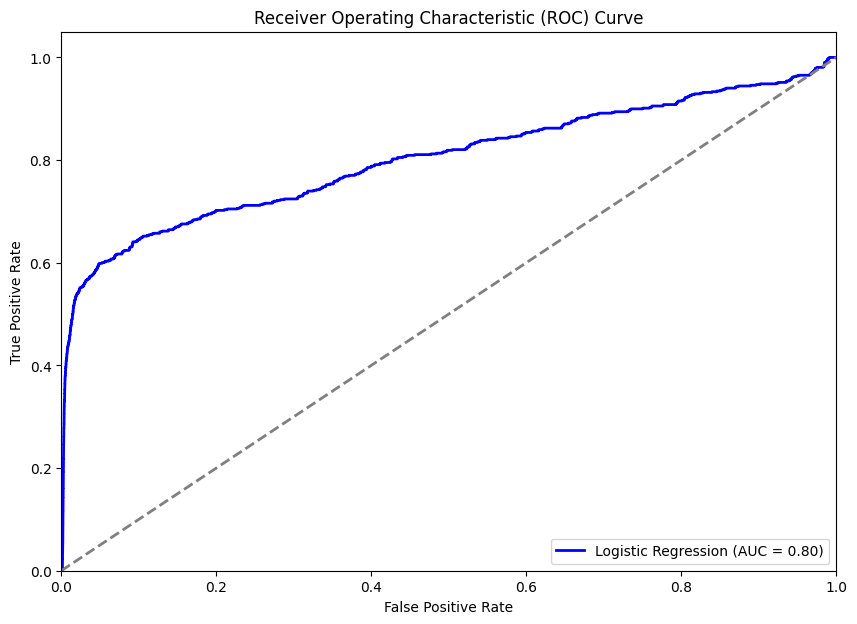

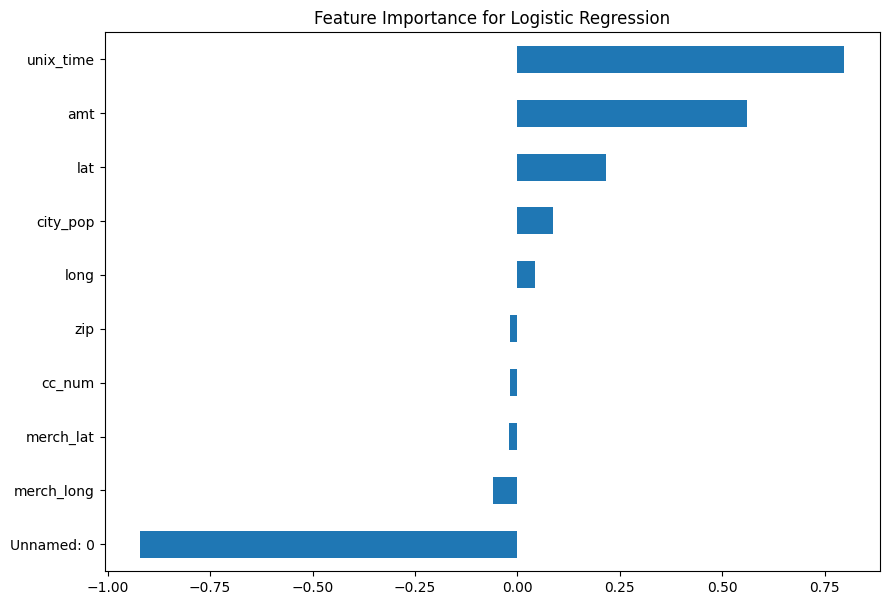

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

print("Training Data Info:")
print(train_df.info())
print("\nTraining Data Sample:")
print(train_df.head())

print("\nTesting Data Info:")
print(test_df.info())
print("\nTesting Data Sample:")
print(test_df.head())

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

numeric_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()

numeric_columns = [col for col in numeric_columns if col != 'is_fraud']

features_train = train_df[numeric_columns]
target_train = train_df['is_fraud']

features_test = test_df[numeric_columns]
target_test = test_df['is_fraud']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(features_train)
X_test_scaled = scaler.transform(features_test)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, target_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)
y_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Evaluation:")
print("Confusion Matrix:")
cm = confusion_matrix(target_test, y_pred_log_reg)
print(cm)

print("\nClassification Report:")
print(classification_report(target_test, y_pred_log_reg))

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr, tpr, thresholds = roc_curve(target_test, y_prob_log_reg)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

coefficients = pd.Series(log_reg.coef_[0], index=features_train.columns)
coefficients = coefficients.sort_values()

plt.figure(figsize=(10, 7))
coefficients.plot(kind='barh')
plt.title('Feature Importance for Logistic Regression')
plt.show()
